Accuracy for PCA is  72.72727272727273 %


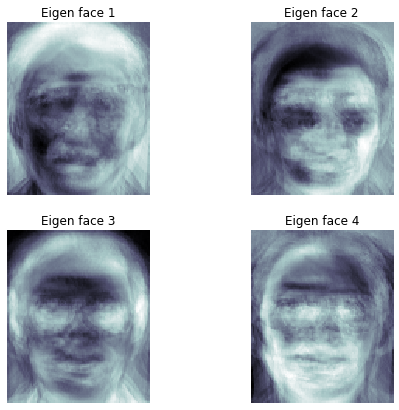

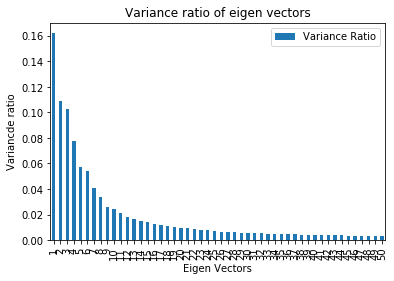

In [2]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from os import listdir
from sklearn.preprocessing import StandardScaler
from os.path import isfile, join
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
image=[]
x_train=[]
x_test =[]
k=0
for i in range(1,12):
    if i==11:
        mypath="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/test/"
    else :   
        mypath="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/training/s"+str(i)+"/"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] 
    for j in range(len(onlyfiles)):
       s=str(mypath)+str(onlyfiles[j])
       img = cv2.imread(s)
       gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       image.append(gray)
       ravel_img=np.ravel(image[k])  
       k +=1
       if i==11:
           x_test.append(ravel_img)
       else:            
           x_train.append(ravel_img)

X_train=np.asarray(x_train)  
X_test=np.asarray(x_test)  
n_features = X_train.shape[1]
X_train = StandardScaler().fit_transform(X_train)
X_test= StandardScaler().fit_transform(X_test)
n_components = 50

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

eigenfaces = pca.components_.reshape((n_components, 112, 92))
var= pca.explained_variance_ratio_

fig = plt.figure(figsize=(8, 7))
for i in range(4):  
    ax = fig.add_subplot(221+i)
    ax.axis('off')
    ax.title.set_text(str('Eigen face ')+str(i+1))
    ax.imshow(pca.components_[i].reshape(eigenfaces[0].shape), cmap=plt.cm.bone)
   
plotdata = pd.DataFrame( {"Variance Ratio": var},  index=np.arange(1,51))
plotdata.plot(kind="bar")
plt.title("Variance ratio of eigen vectors")
plt.xlabel("Eigen Vectors")
plt.ylabel("Variancde ratio")


y_train=[]
for i in range(1 ,11):
    for j in range(6):
        y_train.append(i)

y_test=np.asarray([1,3,3,3,4,4,4,4,5,5,5,1,5,6,6,6,6,7,7,7,7,8,1,8,8,8,9,9,9,9,10,10,10,1,10,0,0,0,0,2,2,2,2,3])
knn = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)
#print(knn_pred)
print("Accuracy for PCA is ",accuracy_score(y_test, knn_pred)*100,'%')





